In [129]:
%matplotlib inline
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit_aer import AerSimulator
from functools import partial

In [22]:
show_unitary = partial(array_to_latex, max_size=100000)
show_state = lambda qc: Statevector(qc).draw('latex')

In [160]:
def get_unitary(qc, sim=AerSimulator()):
    qc_copy = qc.copy()
    qc_copy.save_unitary()
    unitary = sim.run(transpile(qc_copy, sim), shots=1000).result().get_unitary()
    return unitary

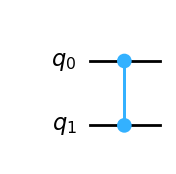

<IPython.core.display.Latex object>

In [161]:
mem = QuantumCircuit(2, name="QROM")
mem.cz(0,1)
display(mem.draw('mpl'))
show_unitary(get_unitary(mem))

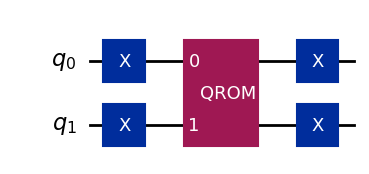

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [207]:
qc = QuantumCircuit(2)

qc.x(range(2))
qc.append(mem, [0,1])
qc.x(range(2))

display(qc.draw('mpl'))
display(show_unitary(get_unitary(qc)))
show_state(qc)